In [1]:
# install support packages
!pip install pywaffle

     |████████████████████████████████| 532kB 5.1MB/s 


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pywaffle as pyw
import seaborn as sns

In [3]:
# ensure reproducible results
rand_state = 1234

In [4]:
# path configuration
PROCESSED_DATA_URL = "https://github.com/INTERTECHNICA-BUSINESS-SOLUTIONS-SRL/COVID-Fake-News-Analysis/raw/main/data/processed/COVIDFakeNewsProcessedData.zip";

# read basic data
# we will used "binary_target" as the classification label
# and "tokens_text_processed_joined" mostly as a source of training data

processed_data = pd.read_csv(PROCESSED_DATA_URL, index_col=None);

In [5]:
# define the target data column name used for analytics

target_data_column_name = "tokens_text_processed_joined";

In [6]:
# determine the structure of the dataset

data = processed_data["multi_target"].to_numpy();
X = ["Veridic News", "Partially Fake News", "Fake News"]; # labels associated with the data
Y = np.bincount(data); # number of news per type

print("The dataset is imbalanced, the number of fake news ({}) is roughly half of the veridic news ({}).".format(Y[1] + Y[2], Y[0]));
print("Out of {} fake news there are {} partially fake news and {} confirmed fake news.".format(Y[1] + Y[2], Y[1], Y[2]));

The dataset is imbalanced, the number of fake news (1036) is roughly half of the veridic news (1966).
Out of 1036 fake news there are 387 partially fake news and 649 confirmed fake news.


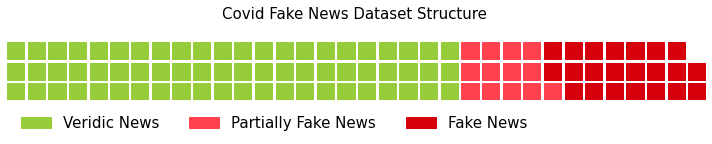

In [7]:
# plotting the structure of the dataset

fig = plt.figure(
    FigureClass = pyw.Waffle, 
    rows = 3,
    values  = Y/30, # down-scale the data for a better representation
    labels = X,
    figsize = (10, 30),
    colors = ["#96CC39", "#FF424E", "#D6000D"],
    legend = {
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.75),
        'ncol': len(X),
        'framealpha': 0,
        'fontsize': 15,
    }
)

plt.title("Covid Fake News Dataset Structure \n", fontsize = 15)

plt.show()

In [8]:
# create convenience data vectors
veridic_news = processed_data[processed_data["binary_target"] == 0];
generic_fake_news = processed_data[processed_data["binary_target"] == 1];

partially_fake_news = processed_data[processed_data["multi_target"] == 1];
fake_news = processed_data[processed_data["multi_target"] == 2];

In [9]:
# plots a probability-normalized histogram for two segments of data
def plot_hist(
    data_1, # first segement of data
    data_2,  # second segment of data
    title # the title of the plot
) :
  plt.rcParams["patch.force_edgecolor"] = False;
  plt.rcParams['patch.edgecolor'] = 'none'

  fig, ax = plt.subplots(
      figsize = (9,3)
  );

  sns.histplot(data_1, ax = ax, color = "#96CC39", alpha = 0.15, stat = "probability", element = "poly", bins = 10);
  sns.histplot(data_2, ax = ax, color = "#D6000D", alpha = 0.15, stat = "probability", element = "poly", bins = 10);

  ax.legend(
    ["Veridic News","Fake News"],
    loc = 'lower left',
    bbox_to_anchor = (0, -0.3),
    ncol = 2,
    framealpha = 0,
    fontsize = 8
  );

  plt.title(title + "\n", fontsize = 15);

  plt.show();

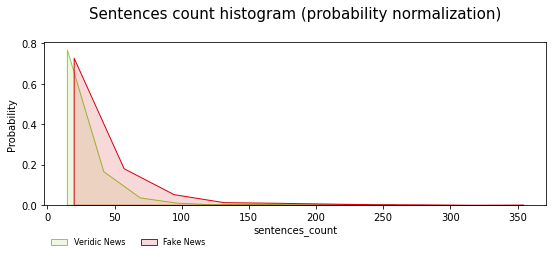

In [10]:
plot_hist (
    veridic_news["sentences_count"],
    generic_fake_news["sentences_count"],
    title = "Sentences count histogram (probability normalization)"
);

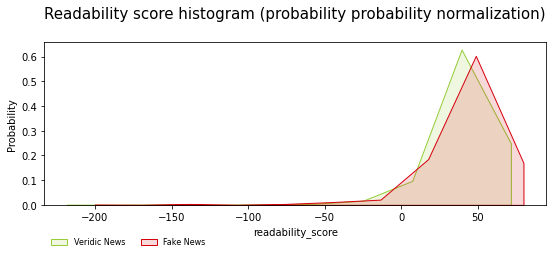

In [11]:
plot_hist (
    veridic_news["readability_score"],
    generic_fake_news["readability_score"],
    title = "Readability score histogram (probability probability normalization)"
);

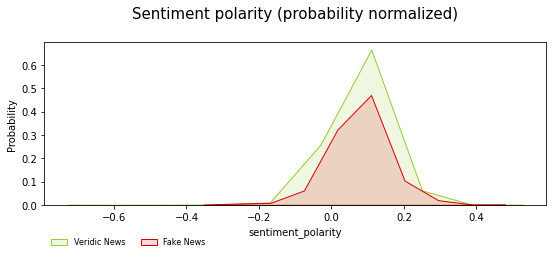

In [12]:
plot_hist (
    veridic_news["sentiment_polarity"],
    generic_fake_news["sentiment_polarity"],
    title = "Sentiment polarity (probability normalized)"
);

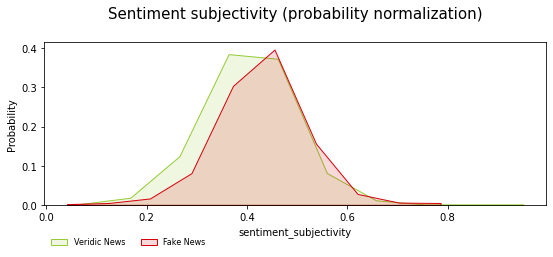

In [13]:
plot_hist (
    veridic_news["sentiment_subjectivity"],
    generic_fake_news["sentiment_subjectivity"],
    title = "Sentiment subjectivity (probability normalization)"
);

In [14]:
# plots a joint distribution for two sets of data 
def plot_joint_distribution (
    data_1_x, # x-axis for the first set of data  
    data_1_y, # y-axis for the first set of data
    data_2_x, # x-axis for the second set of data
    data_2_y, # y-axis for the second set of data
    title # the title of the plot
) :
  plt.rcParams["patch.force_edgecolor"] = False;
  plt.rcParams['patch.edgecolor'] = 'none'

  fig, ax = plt.subplots(
      figsize = (9, 9)
  );

  sns.histplot(x = data_1_x, y = data_1_y, color = "#96CC39", alpha = 0.75, ax = ax);
  sns.histplot(x = data_2_x, y = data_2_y, color = "#D6000D", alpha = 0.75, ax = ax);

  data_1_x_avg = np.mean(data_1_x);  
  data_1_y_avg = np.mean(data_1_y);  
  data_2_x_avg = np.mean(data_2_x);  
  data_2_y_avg = np.mean(data_2_y);  

  ax.axhline(data_1_y_avg, color = "#96CC39", linestyle = "--");
  ax.axhline(data_2_y_avg, color = "#D6000D", linestyle = "--");

  ax.legend(
    ["Veridic News", "Fake News"],
    loc = 'lower left',
    bbox_to_anchor = (0, -0.1),
    ncol = 2,
    framealpha = 0,
    fontsize = 8
  );

  ax.axvline(data_1_x_avg, color = "#96CC39", linestyle = "--");
  ax.axvline(data_2_x_avg, color = "#D6000D", linestyle = "--");

  plt.xlim([-1, 1]);
  plt.ylim([0, 1]);
  plt.title(title + "\n", fontsize = 15);

  plt.show();

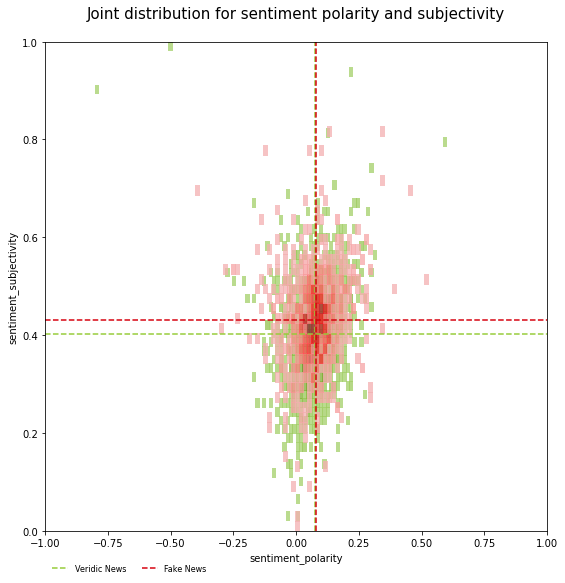

In [15]:
plot_joint_distribution (
    veridic_news["sentiment_polarity"],
    veridic_news["sentiment_subjectivity"],
    generic_fake_news["sentiment_polarity"],
    generic_fake_news["sentiment_subjectivity"],
    "Joint distribution for sentiment polarity and subjectivity"
);   